In [1]:
# https://plot.ly/python/subplots/
import plotly as py
import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs
py.offline.init_notebook_mode(connected=True)

import numpy as np

import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

from IPython import display

from itertools import product

# Task #1 Simple Plot

In [2]:
N = 1024
T = 8#s
f = 1
w = 2*np.pi*f

t = np.linspace(0, T, N)

s = [np.sin(w * t[i]) if i < 512 else np.sin(4*w*t[i]) for i in range(N)]

signal = go.Scatter( 
    x = t,
    y = s,
    name='signal',
    mode='markers'
)

rows = 1
cols = 1
fig = py.tools.make_subplots(rows = rows, cols = cols)
fig['layout'].update(height=rows * 450, width=cols * 900)

fig.append_trace(signal, 1, 1)

py.offline.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]



# Task #2 Turtles

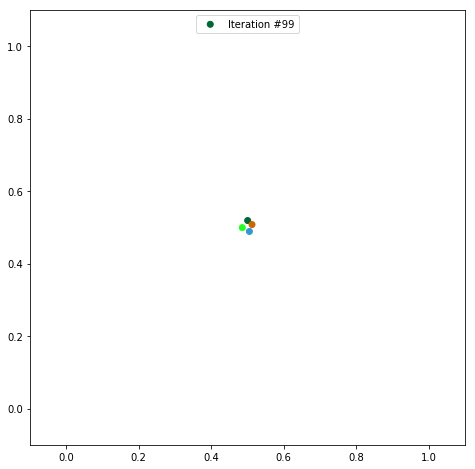

In [3]:
def turtles_step(xs, ys, vel, dtime):
    n = len(xs)
    for i in range(n):
        dx = xs[(i + 1) % n] - xs[i]
        dy = ys[(i + 1) % n] - ys[i]
        
        angle = np.angle(dx + 1j*dy)
        
        dr = vel * dtime
        
        stepx = dr * np.cos(angle)
        stepy = dr * np.sin(angle)
        xs[i] += stepx
        ys[i] += stepy


# 4 turtles
xs = [0.0, 1.0, 1.0, 0.0]
ys = [0.0, 0.0, 1.0, 1.0]

velocity = 0.1
dtime = 0.1

colors = ['#006633', '#22FF22', '#3399CC', '#CC6600']

plt.rcParams["figure.figsize"] = [8, 8]

for i in range(100):
    try:
        plt.clf()
        plt.axis('square')
        plt.axis([-0.1, 1.1, -0.1, 1.1])
        
        plt.scatter(xs, ys, c=colors)
        plt.legend(['Iteration #' + str(i)], loc=9)
        
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        turtles_step(xs, ys, velocity, dtime)
        time.sleep(dtime)
    except KeyboardInterrupt:
        break

Аналитическая формула: 1414.2135623730949
Численный: 1413


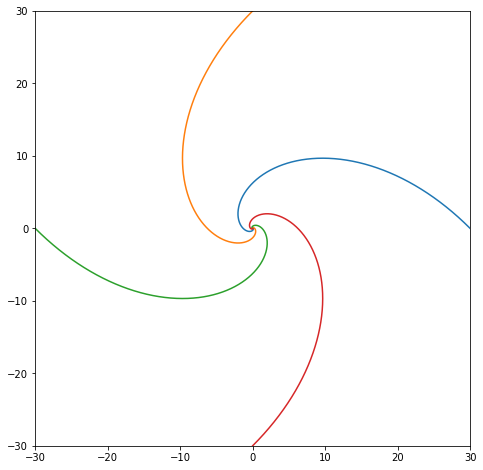

In [4]:
def init_random(n):
    return np.random.rand(n), np.random.rand(n)
    
def init_on_circle(n, r):
    dangle = 2*np.pi / n
    xs = []
    ys = []

    angle = 0.0
    for i in range(n):
        xs.append(r * np.cos(angle))
        ys.append(r * np.sin(angle))
        angle += dangle
    return xs, ys

def turt_sym(xs, ys, iters_max, vel, dtime):
    xtraj = [[x] for x in xs]
    ytraj = [[y] for y in ys]
    n = len(xs)
    for i in range(iters_max):
        turtles_step(xs, ys, vel, dtime)
        for j in range(n):
            xtraj[j].append(xs[j])
            ytraj[j].append(ys[j])
        
        rs = [np.sqrt(x**2 + y**2) for x, y in zip(xs, ys)]
        max_dist = max(rs)
        if max_dist < 2*vel:
            return xtraj, ytraj, i
    return xtraj, ytraj, iters_max
            
    
    
Nturt = 4
r = 30
velocity = 0.03
dtime = 1

xs, ys = init_on_circle(Nturt, r)

iters_max = 20000
xtraj, ytraj, iters = turt_sym(xs, ys, iters_max, velocity, dtime)

plt.rcParams["figure.figsize"] = [8, 8]

plt.axis('square')
plt.axis([-r, r, -r, r])
        
for i in range(Nturt):
    plt.plot(xtraj[i], ytraj[i])
        
print('Аналитическая формула: ' + str(r / (velocity * np.abs(np.cos((np.pi - 2*np.pi/Nturt) / 2)))))
print('Численный: ' + str(iters))

# for i in range(200):
#     try:
#         #plt.clf()
#         plt.axis('square')
#         plt.axis([-0.1, 1.1, -0.1, 1.1])
        
#         plt.scatter(xs, ys)
#         plt.legend(['Iteration #' + str(i)], loc=9)
        
#         display.display(plt.gcf())
#         display.clear_output(wait=True)
        
#         turtles_step(xs, ys, velocity, dtime)
#         time.sleep(dtime)
#     except KeyboardInterrupt:
#         break

# Task #3 Rocket

In [5]:
class Rocket:
    def __init__(self, xmin, xmax, ymax, color):
        self.__color = color
        self.__x = np.random.randint(xmin, xmax)
        self.__y = 0
        self.__xtraj = [self.__x]
        self.__ytraj = [self.__y]
        self.__max_height = ymax
        self.__vy = 50
        
    def max_height(self):
        return self.__max_height
    
    def x(self):
        return self.__x
    
    def y(self):
        return self.__y
    
    def xtraj(self):
        return self.__xtraj
    
    def ytraj(self):
        return self.__ytraj
    
    def color(self):
        return self.__color
    
    def step(self, dtime):
        if self.__y < self.__max_height:
            self.__y += self.__vy * dtime
            self.__xtraj.append(self.__x)
            self.__ytraj.append(self.__y)
            return True
        else:
            return False

In [6]:
class Fragiles:
    def __init__(self, x, y, v, n, color):
        self.__color = color
        self.__n = n
        self.__xs = [x] * n
        self.__ys = [y] * n
        angles = np.random.rand(n) * 2 * np.pi
        
        self.__vxs = [v * np.cos(angle) for angle in angles]
        self.__vys = [v * np.sin(angle) for angle in angles]
        
        self.__vzs = [v * np.sin(angle) for angle in angles]
        
        self.__xtrajs = [[x] for x in self.__xs]
        self.__ytrajs = [[y] for y in self.__ys]
    
    def xs(self):
        return self.__xs
    
    def ys(self):
        return self.__ys
    
    def xtrajs(self):
        return self.__xtrajs
    
    def ytrajs(self):
        return self.__ytrajs
    
    def step(self, dtime):
        g = 9.8
        for i in range(self.__n):
            self.__xs[i] += self.__vxs[i] * dtime
            self.__ys[i] += self.__vys[i] * dtime
            self.__xtrajs[i].append(self.__xs[i])
            self.__ytrajs[i].append(self.__ys[i])
            self.__vys[i] += -g * dtime

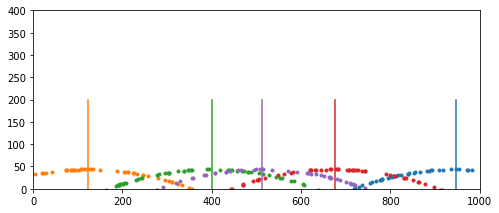

In [ ]:
rockets = [Rocket(0, 1000, 200, 'b') for i in range(5)]

dtime = 0.1

plt.rcParams["figure.figsize"] = [8, 6]

while True:
    try:
        plt.clf()
        
        for rocket in rockets:
            plt.plot(rocket.xtraj(), rocket.ytraj())

        plt.axis('square')
        plt.axis([0, 1000, 0, 400])
        
        display.display(plt.gcf())
        display.clear_output(wait=True)

        if all([not rocket.step(dtime) for rocket in rockets]) :
            break
        
        time.sleep(dtime)
    except KeyboardInterrupt:
        break
        
fragiles = [Fragiles(rocket.x(), rocket.y(), 50, 400, rocket.color()) for rocket in rockets]

while max([max(frags.ys()) for frags in fragiles]) > 0:
    try:
        plt.clf()
        
        for rocket in rockets:
            plt.plot(rocket.xtraj(), rocket.ytraj())
        
        for frags in fragiles:
            plt.scatter(frags.xs(), frags.ys(), marker='.')
        
#         for i in range(Nfrag):
#             plt.plot(fragiles.xtrajs[i], fragiles.ytrajs[i])
            
        plt.axis('square')
        plt.axis([0, 1000, 0, 400])
        
        display.display(plt.gcf())
        display.clear_output(wait=True)

        for frags in fragiles:
            frags.step(dtime)
        time.sleep(dtime)
    except KeyboardInterrupt:
        break

# Task #4 Fields

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Charged:
    def el_potential(self): raise NotImplementedError
    
    @staticmethod
    def el_potential_total(chargeds):
        return lambda point: sum(charged.el_potential()(point) for charged in chargeds)
        
class ChargedPoint(Charged):
    def __init__(self, q, point):
        self.__q = q
        self.__point = point
    
    @property
    def q(self):
        return self.__q
    
    @property
    def point(self):
        return self.__point
    
    def el_potential(self):
        return lambda point: self.q / np.hypot(self.point.x - point.x, self.point.y - point.y)

    
class ChargedThread(Charged):
    def __init__(self, dqdl, point):
        self.__dqdl = dqdl
        self.__point = point
    
    @property
    def dqdl(self):
        return self.__dqdl
    
    @property
    def point(self):
        return self.__point
    
    def el_potential(self):
        r0 = 1
        return lambda point: -2 * self.dqdl * np.log(np.hypot(self.point.x - point.x, self.point.y - point.y) / r0)


class ChargedBand(Charged):
    def __init__(self, dqdl, start, end, num_threads):
        xs = np.linspace(start.x, end.x, num=num_threads)
        ys = np.linspace(start.y, end.y, num=num_threads)
        self.__threads = [ChargedThread(dqdl / num_threads, Point(x, y)) for x, y in zip(xs, ys)]
        
    @property
    def threads(self):
        return self.__threads
    
    def el_potential(self):
        return lambda point: sum(thread.el_potential()(point) for thread in self.threads)

In [ ]:
def draw_potential(x0, x1, y0, y1, num_samples, chargeds):
    xs = np.linspace(x0, x1, num_samples)
    ys = np.linspace(y0, y1, num_samples)

    potential_total = Charged.el_potential_total(chargeds)

    samples = []
    xxs = []
    yys = []
    for x, y in product(xs, ys):
        xxs.append(x)
        yys.append(y)
        samples.append(potential_total(Point(x, y)))

    samples = np.array(samples)

#     clim0,clim1 = -5,5
    # samples = np.interp(samples, [min(samples), max(samples)], [clim0, clim1])
#     samples[samples < clim0] = clim0 * 0.999999 # to avoid error
#     samples[samples > clim1] = clim1 * 0.999999 # to avoid error

    plt.rcParams["figure.figsize"] = [8, 8]
    plt.tricontour(xxs, yys, samples, 10, colors="0.3")
    plt.tricontourf(xxs, yys, samples, 100, cmap=cm.jet)

    cbar = plt.colorbar()
    # cbar.set_clim(clim0, clim1)
    # cbar.set_ticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
    cbar.set_label("Electric Potential")

    plt.xlabel('$x$')
    plt.ylabel('$y$')

    plt.axis('square')
    plt.axis([x0, x1, y0, y1])
    plt.show()

In [ ]:
chargeds = [
            ChargedPoint( 1, Point(-1, 0)),
            ChargedPoint(-1, Point( 1, 0)),
            ChargedPoint(-1, Point( 0, 1)),
            ChargedPoint( 1, Point( 0, -1))
           ]

draw_potential(-3, 3, -3, 3, 100, chargeds)

In [ ]:
chargeds = [
            ChargedThread( 1, Point(-1, 0)),
            ChargedThread(-1, Point( 1, 0))
           ]

draw_potential(-3, 3, -3, 3, 100, chargeds)

In [ ]:
chargeds = [
            ChargedBand(1, Point(-2, 0), Point(2, 0), 64),
           ]

draw_potential(-3, 3, -3, 3, 100, chargeds)

In [ ]:
chargeds = [
            ChargedThread( 1, Point(-0.1, 0)),
            ChargedThread(-1, Point( 0.1, 0))
           ]

draw_potential(-5, 5, -5, 5, 300, chargeds)